In [3]:
print("hello world")

hello world


In [4]:
import numpy as np
import tensorflow as tf

In [5]:
fashion_dataset = tf.keras.datasets.fashion_mnist

In [6]:
(x_train, y_train) , (x_test, y_test) = fashion_dataset.load_data()

In [7]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


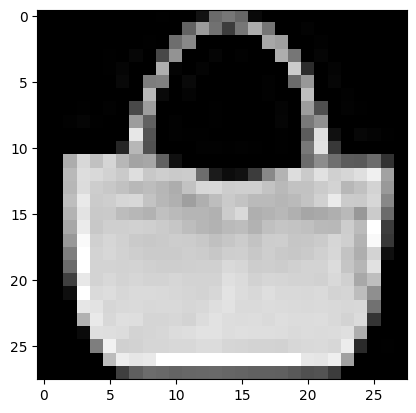

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[100], cmap = plt.get_cmap('gray'))

Model creation

In [9]:
#creating the model
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K
from tensorflow.keras.utils import to_categorical

In [10]:
batch_size = 128
epochs = 10

img_row = x_train[0].shape[0]
img_column = x_train[1].shape[0]

#change shape to (60000,28,28,1)
x_train = np.reshape(x_train, (x_train.shape[0], img_row, img_column, 1))
x_test = np.reshape(x_test, (x_test.shape[0], img_row, img_column, 1))

#normalize the data
x_train = x_train/255
x_test = x_test/255

#one hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [11]:
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

In [12]:
#create CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu', input_shape=(img_row, img_column, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                        

In [14]:
#train the model
model_train = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 69s 142ms/step - loss: 0.4362 - accuracy: 0.8481 - val_loss: 4.5084 - val_accuracy: 0.3676
Epoch 2/10
469/469 [==============================] - 79s 168ms/step - loss: 0.2813 - accuracy: 0.8998 - val_loss: 0.2864 - val_accuracy: 0.8955
Epoch 3/10
469/469 [==============================] - 79s 168ms/step - loss: 0.2345 - accuracy: 0.9163 - val_loss: 0.2429 - val_accuracy: 0.9136
Epoch 4/10
469/469 [==============================] - 80s 172ms/step - loss: 0.2048 - accuracy: 0.9268 - val_loss: 0.2192 - val_accuracy: 0.9199
Epoch 5/10
469/469 [==============================] - 81s 173ms/step - loss: 0.1856 - accuracy: 0.9321 - val_loss: 0.2466 - val_accuracy: 0.9130
Epoch 6/10
469/469 [==============================] - 83s 176ms/step - loss: 0.1660 - accuracy: 0.9386 - val_loss: 0.2181 - val_accuracy: 0.9245
Epoch 7/10
469/469 [==============================] - 82s 175ms/step - loss: 0.1537 - accuracy: 0.9445 - val_loss: 0.2363 - val_ac

In [15]:
model.save('clothing_classification.h5')

In [16]:
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def load_image(filename):
    img = load_img(filename, color_mode='grayscale', target_size=(28, 28))
    img = img_to_array(img)
    img = img.reshape(1, 28, 28, 1)
    img = img.astype('float32')
    img = img / 255.0
    return img

# Load and preprocess the image
img = load_image('sneaker.jpg')

# Load the pre-trained model
model = load_model('clothing_classification.h5')

# Predict the class
class_prediction = np.argmax(model.predict(img), axis=-1)
predicted_class = class_prediction[0]
print(predicted_class)

# Map apparel category with the numerical class
if predicted_class == 0:
    product = "T-shirt/top"
elif predicted_class == 1:
    product = "Trouser"
elif predicted_class == 2:
    product = "Pullover"
elif predicted_class == 3:
    product = "Dress"
elif predicted_class == 4:
    product = "Coat"
elif predicted_class == 5:
    product = "Sandal"
elif predicted_class == 6:
    product = "Shirt"
elif predicted_class == 7:
    product = "Sneaker"
elif predicted_class == 8:
    product = "Bag"
else:
    product = "Ankle boot"

print(f'The predicted apparel category is: {product}')

1/1 [==============================] - 0s 155ms/step
8
The predicted apparel category is: Bag


In [17]:
import pickle

In [18]:
filename = 'clothing_classification.pkl'
pickle.dump(model, open(filename, 'wb'))    